In [78]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [79]:
img = cv.imread('../data/test_images/captured-images/20241124_173408.jpg', 0)

In [80]:
_, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

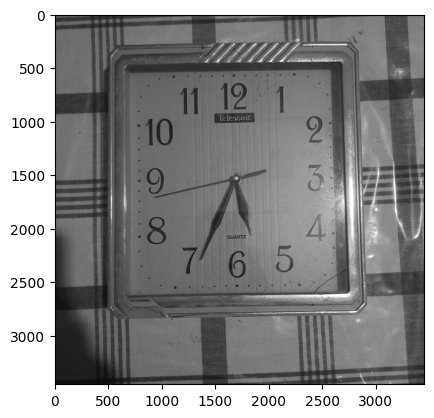

In [81]:
plt.imshow(img, 'gray')

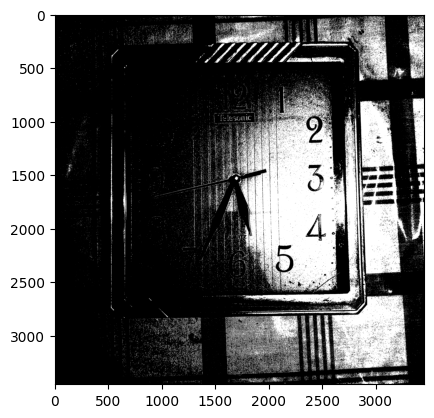

In [82]:
plt.imshow(th1, 'gray')

In [83]:
%matplotlib inline

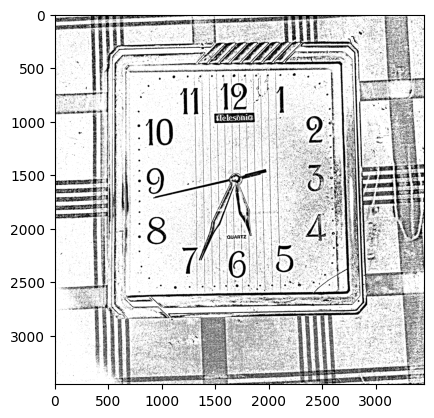

In [84]:
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 51, 10)
plt.imshow(th2, 'gray')

In [85]:
# th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31, 2)
# plt.imshow(th3, 'gray')

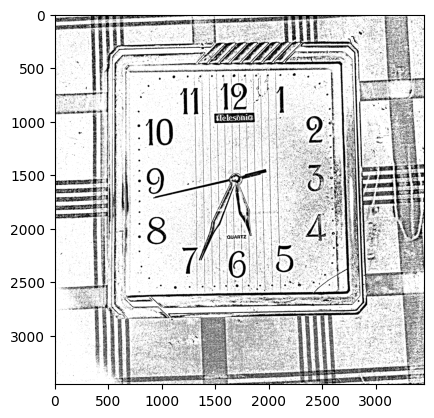

In [86]:
_, th4 = cv.threshold(th2, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(th4, 'gray')

In [87]:
# %matplotlib qt

In [88]:
# height = 800
# aspect_ratio = img.shape[1] / img.shape[0]
# width = int(height * aspect_ratio)

# cv.namedWindow('Image', cv.WINDOW_NORMAL)
# cv.resizeWindow('Image', width, height)
# cv.imshow('Image', th4)
# cv.waitKey(0)
# cv.destroyAllWindows()


0: 640x640 (no detections), 125.1ms
Speed: 8.0ms preprocess, 125.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


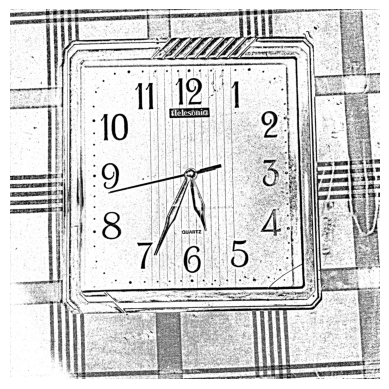

In [89]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Your adaptive thresholding code
height = 800
aspect_ratio = img.shape[1] / img.shape[0]
width = int(height * aspect_ratio)

# Save the output image to a specific path
output_image_path = './output_image.jpg'  # Replace with your desired path
cv2.imwrite(output_image_path, th4)

# Load the YOLOv11 Nano model
model = YOLO('yolo11s.pt')

# Load the saved image
image = cv2.imread(output_image_path)

# Perform object detection with adjusted parameters
results = model(image, conf=0.5, iou=0.4)  # Adjust conf and iou thresholds as needed

# Display the results using matplotlib
for result in results:
    result_image = result.plot()  # Get the image with predictions
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis('off')  # Hide axes
    plt.show()